In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

if __name__ == '__main__':
    # Set the total amount of week in a year
    N = 52
    # Create empty list of size N for both the upswing and downswing options
    Call = np.zeros((N+1, N+1))
    Put = np.zeros((N+1,N+1))
    # Calculate all the possible gas prices in a given year with initial price at $1
    # if they go up or down by a factor of 10% every week
    S = np.array([1.1**(2*j - N) for j in range(N)])
    Stock = np.zeros((N+1, N+1))
    Stock[0,0] = 1
    #Calculate all the possible stock prices at each position        
    for i in range(1,N+1):
        Stock[i,0] = (11/10) * Stock[i-1,0]
                    
        for j in range(1, i+1):
            Stock[i,j] = (10/11) * Stock[i-1,j-1]
    # Calculate each option price backwards        
    for j in range(N+1):
        Call[N,j] = max(0, Stock[N,j] -1)
        Put[N,j] = max(0, 1 - Stock[N,j])
    for i in range(N-1,-1,-1):
        for j in range(i+1):
            Call[i,j] =  (10/21)*Call[i+1,j] +(11/21)*Call[i+1,j+1]
            if Call[i,j] < Stock[i,j]-1:
                print('Calls to be exercised',i,j)
                Call[i,j] = max(0, Stock[i,j] - 1)
            Put[i,j] =  (10/21)*Put[i+1,j] +(11/21)*Put[i+1,j+1]
            if Put[i,j] < 1 - Stock[i,j]:
                print('Puts to be exercised',i,j)
                Put[i,j] = max(0, 1-Stock[i,j])

    print(50*Call[0,0], 50000 *Put[0,0])
    

Calls to be exercised 51 14
Calls to be exercised 51 22
Calls to be exercised 51 25
Puts to be exercised 51 30
Puts to be exercised 51 35
Puts to be exercised 50 40
Puts to be exercised 48 39
Puts to be exercised 46 38
Puts to be exercised 44 37
Puts to be exercised 42 36
Puts to be exercised 40 35
Puts to be exercised 38 34
Puts to be exercised 38 35
Puts to be exercised 36 34
Puts to be exercised 34 33
Puts to be exercised 32 32
13.37994509890907 13379.945098909038


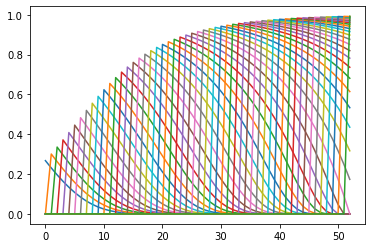

In [3]:
plt.plot(Put)

In [11]:
import pandas as pd
call = pd.DataFrame(Call)
put = pd.DataFrame(Put)

In [12]:
call

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.267599,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.330979,0.209981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.406253,0.262547,0.162193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.494890,0.325675,0.205159,0.123133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.598391,0.400798,0.257381,0.157684,0.091723,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.718281,0.489400,0.320250,0.200227,0.119008,0.066917,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.856096,0.592995,0.395223,0.252093,0.153077,0.088037,0.047718,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.013383,0.713108,0.483801,0.314698,0.195180,0.114802,0.063705,0.033184,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.191710,0.851267,0.587508,0.389523,0.246675,0.148366,0.084289,0.044992,0.022449,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.392686,1.009004,0.707870,0.478088,0.309009,0.190008,0.110509,0.060453,0.030937,0.014732,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
put

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,2.675989e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,2.309788e-01,3.008899e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,1.962534e-01,2.625474e-01,3.357466e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,1.638898e-01,2.256748e-01,2.960680e-01,3.718180e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,1.342910e-01,1.907978e-01,2.573812e-01,3.312379e-01,4.087091e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5,1.077710e-01,1.584001e-01,2.202502e-01,2.911366e-01,3.676936e-01,4.459960e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
6,8.453478e-02,1.288948e-01,1.852232e-01,2.520930e-01,3.266307e-01,4.050234e-01,4.832438e-01,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
7,6.466565e-02,1.025976e-01,1.528013e-01,2.146977e-01,2.860888e-01,3.634871e-01,4.427837e-01,5.200256e-01,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
8,4.812089e-02,7.970633e-02,1.234079e-01,1.795225e-01,2.466750e-01,3.219195e-01,4.012758e-01,4.805182e-01,5.559414e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
9,3.473804e-02,6.028712e-02,9.736016e-02,1.470877e-01,2.090088e-01,2.809171e-01,3.591944e-01,4.395317e-01,5.177787e-01,0.590635,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
